## Image denoising problem. 

**Aim:** We will train the autoencoder to map noisy digits images to clean digits images.

### Load MNIST dataset

In [1]:
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


### Generate noisy images

Run the below code to add noise to the original mnist images

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11501568/11490434 [==============================] - 2s 0us/step


### Plot the noisy images

Run the below code to plot the noisy images

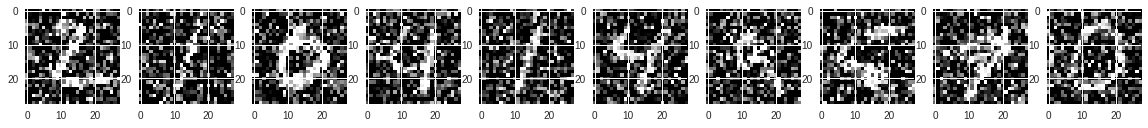

In [23]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
plt.show()

### Model

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K


input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='sgd', loss='binary_crossentropy')


In [20]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=1000,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.1204 - val_loss: 0.1192
Epoch 2/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.1203 - val_loss: 0.1192
Epoch 3/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.1203 - val_loss: 0.1191
Epoch 4/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.1203 - val_loss: 0.1190
Epoch 5/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.1202 - val_loss: 0.1190
Epoch 6/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.1202 - val_loss: 0.1189
Epoch 7/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.1201 - val_loss: 0.1189
Epoch 8/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1201 - val_loss: 0.1189
Epoch 9/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.1201 - val_loss: 0.1

### Predict

In [0]:
denoised_imgs = autoencoder.predict(x_test_noisy)

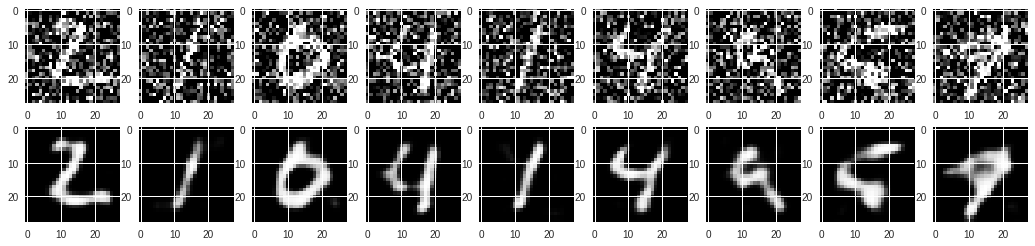

In [22]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display noisy images
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))

    # display denoised images
    ax = plt.subplot(2, n, i + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
plt.show()